<a href="https://colab.research.google.com/github/vipultrivedidsaimlbi/10_21_Flask_Medical-Insurance/blob/main/KN1_DL_25_Nov_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.9 kB/s 
     |████████████████████████████████| 6.0 MB 50.4 MB/s 
     |████████████████████████████████| 439 kB 71.4 MB/s 
     |████████████████████████████████| 1.7 MB 56.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [37]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [38]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [39]:
dataset=pd.read_csv(r"Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
## divide dataset into dependant and independent features
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [41]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [42]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [43]:
#Feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
geography
gender=pd.get_dummies(x['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [44]:
#concatinate with datframe
x=x.drop(['Geography','Gender'],axis=1)

In [45]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [46]:
x=pd.concat([x,geography,gender],axis=1)


In [47]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [50]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
# distance based algo

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [55]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [56]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [57]:
x_train.shape

(8000, 11)

In [59]:
## part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [62]:
classifier=Sequential()


In [64]:
classifier.add(Dense(units=11,activation='relu'))

In [67]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [68]:
# adding the second neuron
classifier.add(Dense(units=6,activation='relu'))

In [69]:
# adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [70]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [73]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000
536/536 [==============================] - 7s 5ms/step - loss: 0.5073 - accuracy: 0.7962 - val_loss: 0.4583 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4438 - accuracy: 0.7962 - val_loss: 0.4399 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4324 - accuracy: 0.7962 - val_loss: 0.4367 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4271 - accuracy: 0.7962 - val_loss: 0.4328 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4221 - accuracy: 0.8117 - val_loss: 0.4289 - val_accuracy: 0.8175
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4171 - accuracy: 0.8246 - val_loss: 0.4232 - val_accuracy: 0.8194
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4085 - accuracy: 0.8317 - val_loss: 0.4135 - val_accuracy:

KeyboardInterrupt: ignored

In [78]:
# early stopping keras

import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [79]:
model_history.history.keys()

NameError: ignored

In [80]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3309 - accuracy: 0.8664 - val_loss: 0.3627 - val_accuracy: 0.8501
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3320 - accuracy: 0.8634 - val_loss: 0.3620 - val_accuracy: 0.8508
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3313 - accuracy: 0.8634 - val_loss: 0.3634 - val_accuracy: 0.8519
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3312 - accuracy: 0.8640 - val_loss: 0.3627 - val_accuracy: 0.8523
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3320 - accuracy: 0.8625 - val_loss: 0.3647 - val_accuracy: 0.8512
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3322 - accuracy: 0.8649 - val_loss: 0.3627 - val_accuracy: 0.8508
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3312 - accuracy: 0.8655 - val_loss: 0.3630 - val_accuracy:

In [84]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

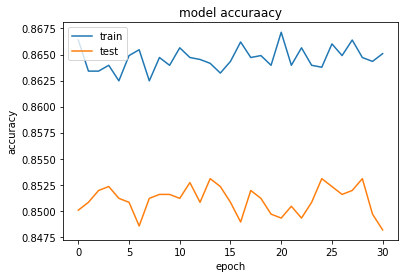

In [86]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuraacy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [87]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

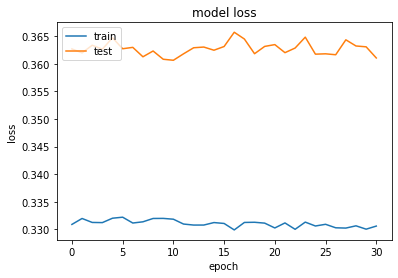

In [88]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [89]:
# part 3-making the prediction and evaluation the model
# predicting the test set results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [90]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[1513,   82],
       [ 196,  209]])

In [91]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [92]:
score

0.861

In [95]:
# get the weights
classifier.get_weights()

[array([[-1.27033591e-01, -9.33082625e-02,  6.03024900e-01,
          4.14194524e-01,  4.13194852e-04,  1.35054559e-01,
          7.29370415e-02, -2.75578704e-02, -4.46691424e-01,
         -1.02123037e-01, -1.01235742e-02],
        [ 6.22644007e-01, -2.54807115e-01, -4.58922952e-01,
         -5.75233877e-01,  6.28613085e-02,  4.14754808e-01,
         -2.05145001e-01, -8.02926958e-01,  2.15359583e-01,
         -6.03783011e-01,  4.30796146e-01],
        [ 1.75462365e-02, -3.14694941e-01, -1.96859747e-01,
          1.49467185e-01, -5.91176329e-03,  2.11898625e-01,
         -5.69382682e-03,  4.83125038e-02, -8.56195390e-02,
         -1.31998420e-01,  1.69988737e-01],
        [-6.59290934e-03, -8.21318477e-03, -8.70323554e-02,
         -3.49246830e-01,  4.59832907e-01, -6.36798050e-03,
         -3.16312551e-01,  1.20987728e-01,  2.25760862e-02,
         -2.07986131e-01,  1.13084301e-01],
        [ 6.83158636e-03,  2.26340190e-01, -4.71433759e-01,
          4.91667613e-02,  1.34963763e+00,  